In [1]:
import src.util as ut
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Xa, Ya = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=False)
Xb, Yb = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=False)
print(Xa.shape)
print(Ya.shape)

(100, 2)
(100,)


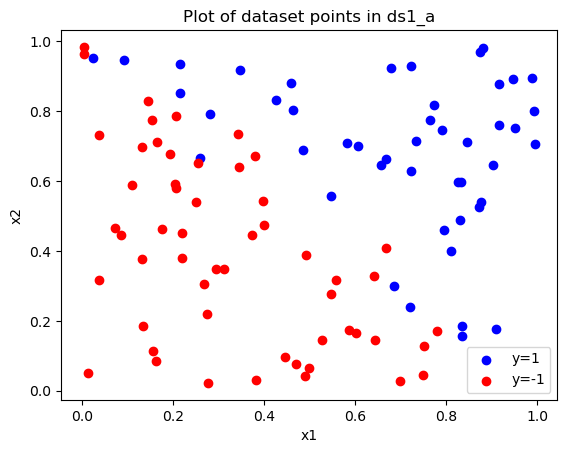

In [3]:
x1_pos = [x for x, label in zip(Xa[:,0], Ya) if label == 1]
x2_pos = [x for x, label in zip(Xa[:,1], Ya) if label == 1]

x1_neg = [x for x, label in zip(Xa[:,0], Ya) if label == -1]
x2_neg = [x for x, label in zip(Xa[:,1], Ya) if label == -1]

# Plot
plt.scatter(x1_pos, x2_pos, color='blue', label='y=1')
plt.scatter(x1_neg, x2_neg, color='red', label='y=-1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Plot of dataset points in ds1_a')
plt.show()

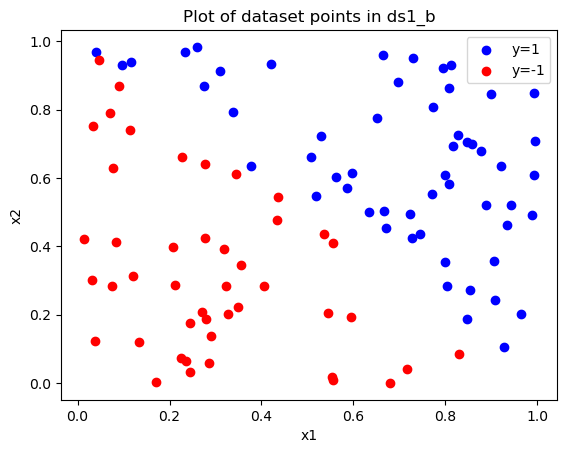

In [4]:
x1_pos = [x for x, label in zip(Xb[:,0], Yb) if label == 1]
x2_pos = [x for x, label in zip(Xb[:,1], Yb) if label == 1]

x1_neg = [x for x, label in zip(Xb[:,0], Yb) if label == -1]
x2_neg = [x for x, label in zip(Xb[:,1], Yb) if label == -1]

# Plot
plt.scatter(x1_pos, x2_pos, color='blue', label='y=1')
plt.scatter(x1_neg, x2_neg, color='red', label='y=-1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Plot of dataset points in ds1_b')
plt.show()

In [5]:
import numpy as np


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return


In [6]:

Xa, Ya = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30387 iterations


In [7]:
Xb, Yb = ut.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)

Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 340000 iterations
Finished 350000 iterations
Finished 360000 iterations
Finished 370000 iterations
Finished 3

KeyboardInterrupt: 

### (a)
Dataset A is not linearly separable → logistic regression (without regularization) has a finite maximizer / finite parameter vector
𝜃
θ and gradient descent converges to it.
Dataset B is linearly separable → the likelihood can be improved arbitrarily by scaling
𝜃
θ (no finite maximizer). In practice gradient descent pushes
∥
𝜃
∥
∥θ∥ to grow without bound and the algorithm does not converge to a finite
𝜃
θ.

### (b) Explanation of Unexpected Behavior on Dataset B

We begin with the logistic regression model for labels $y_i \in \{-1,+1\}$:

$$
P(y_i \mid x_i; \theta) = \sigma(y_i \theta^\top x_i), \quad
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

The negative log-likelihood (NLL) is:

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^m \log\left(1 + e^{-y_i \theta^\top x_i}\right).
$$

---

**Gradient derivation**

For one sample,

$$
\ell_i(\theta) = \log\big(1 + e^{-y_i \theta^\top x_i}\big).
$$

Differentiating:

$$
\nabla_\theta \ell_i = -\, y_i x_i \cdot \frac{1}{1 + e^{y_i \theta^\top x_i}}.
$$

Thus, the full gradient is:

$$
\nabla_\theta J(\theta) = -\frac{1}{m}\sum_{i=1}^m y_i x_i \cdot
\frac{1}{1 + e^{y_i \theta^\top x_i}}.
$$

This matches the code implementation, where

$$
\texttt{probs} = \frac{1}{1+e^{y_i \theta^\top x_i}}.
$$

---

**Why dataset B fails to converge**

If the dataset is **linearly separable** (as in dataset B), then there exists a vector $\theta$ such that

$$
y_i \theta^\top x_i > 0 \quad \forall i.
$$

In this case, the loss $J(\theta)$ can be made arbitrarily small by scaling $\|\theta\| \to \infty$.

Intuitively, the model keeps increasing the magnitude of $\theta$ to push $P(y_i|x_i)$ closer to $1$, but no finite $\theta$ achieves the maximum likelihood.

Hence, the gradient descent procedure never converges. Instead, the parameter norms diverge.

---

If the dataset is **not linearly separable** (as in dataset A), then no finite $\theta$ can perfectly classify all points.
The optimizer therefore settles at a finite optimum $\theta^\star$, where the gradient vanishes:

$$
\nabla_\theta J(\theta^\star) = 0.
$$

As a result, convergence occurs in a few thousand iterations.

---

**Empirical Evidence**

- **Dataset A:** Converges in $\sim 2000$ iterations.
- **Dataset B:** Diverges (parameters grow without bound).

This is not due to numerical error, but a fundamental property of logistic regression:

- For separable data, the MLE does not exist in a finite parameter space.
- For non-separable data, the MLE is finite and well-defined.

---

**Conclusion**

- The unexpected behavior arises because in dataset B the data is perfectly separable, causing the MLE for $\theta$ to diverge.
- For dataset A, non-separability ensures a finite optimum and convergence.


### (c)

#### (i) Using different constant learning rates

In [8]:
import src.util as util
import numpy as np


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y, learning_rate):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if i > 1e+20:
            print('Iterations are going to infinity')
            break
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return




In [9]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya, learning_rate=100)
print('Training on dataset A complete')

print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb, learning_rate=100)
print('Training on dataset B complete')


==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
Finished 110000 iterations
Finished 120000 iterations
Finished 130000 iterations
Finished 140000 iterations
Finished 150000 iterations
Finished 160000 iterations
Finished 170000 iterations
Finished 180000 iterations
Finished 190000 iterations
Finished 200000 iterations
Finished 210000 iterations
Finished 220000 iterations
Finished 230000 iterations
Finished 240000 iterations
Finished 250000 iterations
Finished 260000 iterations
Finished 270000 iterations
Finished 280000 iterations
Finished 290000 iterations
Finished 300000 iterations
Finished 310000 iterations
Finished 320000 iterations
Finished 330000 iterations
Finished 340000 iterations
Finished 350000 iterations
Finished 360000 iteration

KeyboardInterrupt: 

In [10]:
# Important note: you do not have to modify this file for your homework.

import src.util as util
import numpy as np


def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        learning_rate = learning_rate/i**2
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return


    

In [11]:
print('==== Training model on data set A ====')
Xa, Ya = util.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_a.csv', add_intercept=True)
logistic_regression(Xa, Ya)
print('Training on dataset A complete')

print('\n==== Training model on data set B ====')
Xb, Yb = util.load_csv('/home/vedant/Codes&Projects/CS229/problem_sets/PS_2/data/ds1_b.csv', add_intercept=True)
logistic_regression(Xb, Yb)
print('Training on dataset B complete')

==== Training model on data set A ====
Converged in 12 iterations
Training on dataset A complete

==== Training model on data set B ====
Converged in 12 iterations
Training on dataset B complete


So both the datasets are converging with very less number of iterations when learning rate is being decreased by $1/t^2$

it will help $ \alpha \nabla_\theta J(\theta^\star) < 0.0001$ in less iterations

(iii) No, linear scaling will not help because it is already scaled

(iv) Yes, L_2 regularisation will help to converge $\theta$

(v) Yes, Zero mean gaussian noise will help data to become linearly unseparable by adding some noise which will converge $\theta$

### (d)
No, the hinge loos used in SVM is not vulnerable to dataset like B which is linearly seperable whoose hinge loss will be 0 always which is not vulnerable instead using SVM it will be able to predict decision boundary without overfitting which is pros of SVMs